### **Mestrado Profisional PROFICAM - ITV**

## **Introdução a Visão Computacional**

### Aula 03 - Segmentação, Features

Documentação extra do OpenCV pode ser visualizada em: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

Importar as bibliotecas e dependencias necessarias

In [1]:
# import para melhorar a compatibilidade entre python2 e python3 
    
from __future__ import print_function

A instalação do opencv-python permite rodar os codigos relacionados ao SIFT, que são licenciados por padrão e não estão na instalação normal de OpenCV

In [2]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())

In [3]:
# Imports necessários

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import imutils
import math

import cv2
#from google.colab.patches import cv2_imshow
%matplotlib inline

### Tip sobre a documentação de python no google ambiente jupyter/ipython/colab

No notebook de Jypyter as funções podem ser auto completadas usando "tab" diretamente no notebook, ou usando o carater ``?``. 

Por exemplo, para mostrar o conteudo do namespace do numpy pode ser usado a seguinte forma:

```ipython
In [3]: np.<TAB>
```

E para mostrar a documentação interna da função de numpy pode ser usado:

```ipython
In [4]: np?
```

A documentação detalhada, com tutoriais e outros recursos podem ser encontrados em http://www.numpy.org.

In [ ]:
# ao executar esse comando vai mostrar a documentação da função ABS (valor absoluto) do numpy
np.abs?

In [4]:
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.5.3


Inicialmente precisamos clonar o repositorio com as imagens que vamos usar para os experimentos

In [5]:
# Baixar os arquivos necessários para a aula
!rm -rf intro_cv_proficam
!git clone https://github.com/h3ct0r/intro_cv_proficam
!cp -r intro_cv_proficam/img img

Cloning into 'intro_cv_proficam'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 69 (delta 9), reused 65 (delta 8), pack-reused 0
Unpacking objects: 100% (69/69), done.


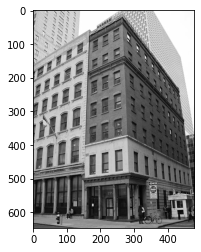

In [6]:
img_gray = cv2.imread('img/building.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

### Sobel edge detector

In [7]:
# 3 X 3 Y-direction kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# 3 X 3 X-direction kernel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print("sobel_y:\n", sobel_y)
print("sobel_x:\n", sobel_x)

sobel_y:
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
sobel_x:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


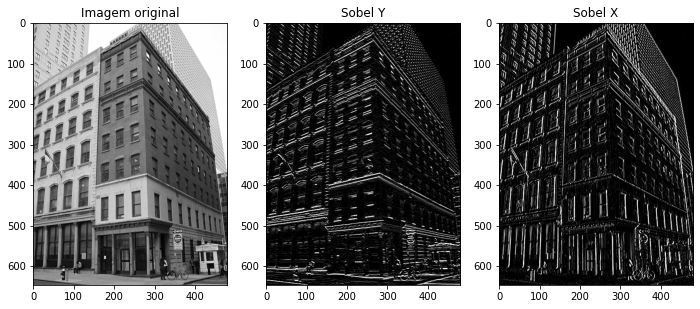

In [8]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_y = cv2.filter2D(img_gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(img_gray, -1, sobel_x)

plt.figure(figsize=(16, 9))  # define o tamanho total da imagem
plt.subplot2grid((1,4),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Imagem original")
plt.imshow(img_gray, cmap='gray')

plt.subplot2grid((1,4),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Sobel Y")
plt.imshow(filtered_image_y, cmap='gray')

plt.subplot2grid((1,4),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Sobel X")
plt.imshow(filtered_image_x, cmap='gray')

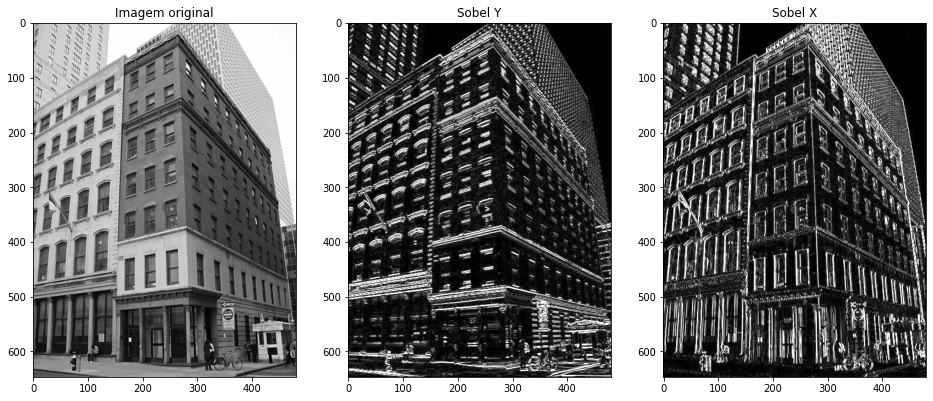

In [9]:
# Tambem podem ser usados os operadores de OpenCV diretamente
sobel_x_filtered_image = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_filtered_image = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

sobel_x_filtered_image = cv2.convertScaleAbs(sobel_x_filtered_image)
sobel_y_filtered_image = cv2.convertScaleAbs(sobel_y_filtered_image)

plt.figure(figsize=(16, 9))  # define o tamanho total da imagem
plt.subplot2grid((1,3),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Imagem original")
plt.imshow(img_gray, cmap='gray')

plt.subplot2grid((1,3),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Sobel Y")
plt.imshow(sobel_y_filtered_image, cmap='gray')

plt.subplot2grid((1,3),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Sobel X")
plt.imshow(sobel_x_filtered_image, cmap='gray')

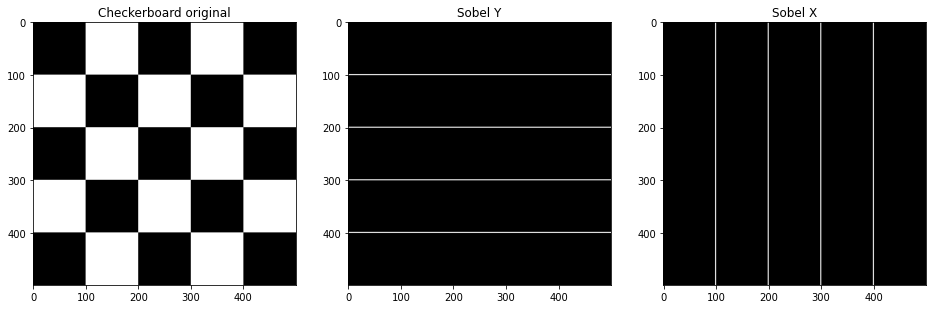

In [10]:
img_checkerboard = cv2.imread('img/chessboard.png', cv2.IMREAD_GRAYSCALE)
sobel_x_filtered_image = cv2.Sobel(img_checkerboard, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_filtered_image = cv2.Sobel(img_checkerboard, cv2.CV_64F, 0, 1, ksize=3)

sobel_x_filtered_image = cv2.convertScaleAbs(sobel_x_filtered_image)
sobel_y_filtered_image = cv2.convertScaleAbs(sobel_y_filtered_image)

plt.figure(figsize=(16, 9))  # define o tamanho total da imagem
plt.subplot2grid((1,3),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Checkerboard original")
plt.imshow(img_checkerboard, cmap='gray')

plt.subplot2grid((1,3),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Sobel Y")
plt.imshow(sobel_y_filtered_image, cmap='gray')

plt.subplot2grid((1,3),(0,2)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Sobel X")
plt.imshow(sobel_x_filtered_image, cmap='gray')

### Laplacian edge detector

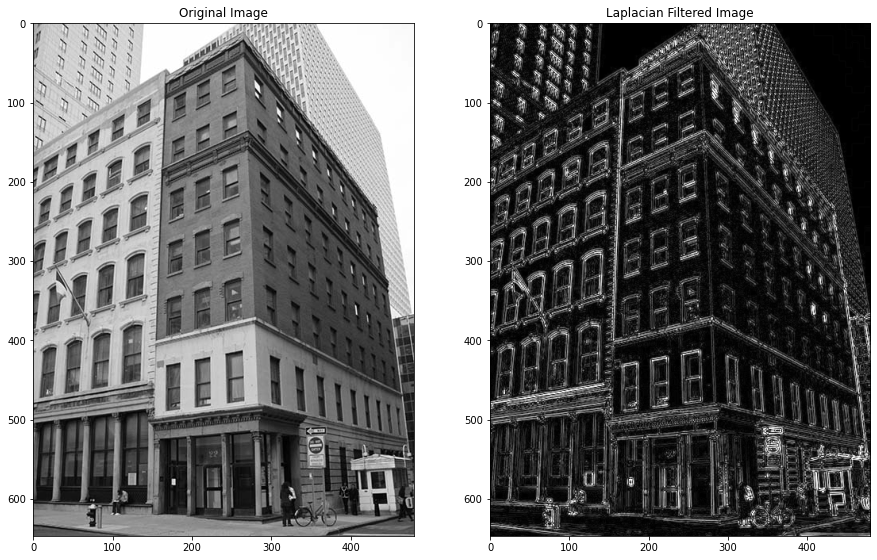

In [11]:
img_blur = cv2.GaussianBlur(img_gray,(3,3),0)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img_blur, ksize=3, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)

# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_gray, cmap='gray')
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

### Detector de bordas de Canny 

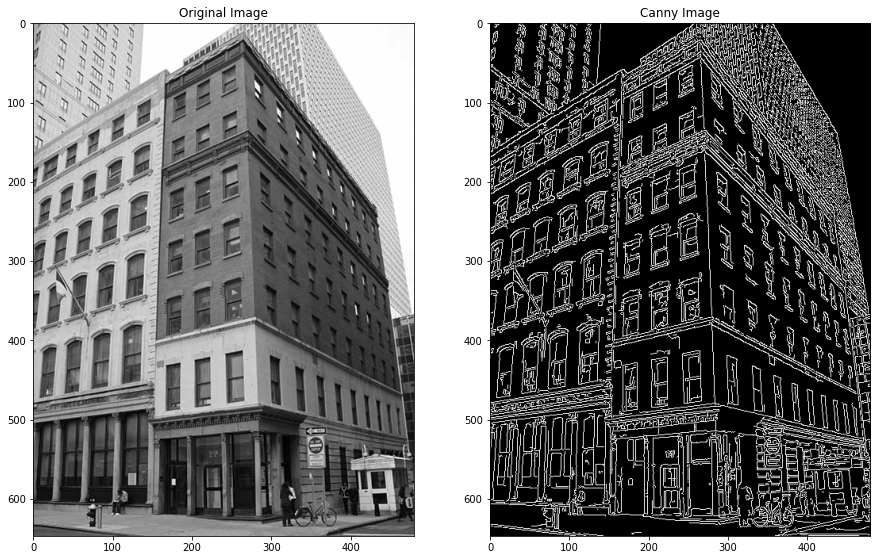

In [12]:
# remove noise
filtered_image = cv2.Canny(img_gray, threshold1=60, threshold2=200)

# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_gray, cmap='gray')
ax2.title.set_text('Canny Image')
ax2.imshow(filtered_image, cmap='gray')

### K-means

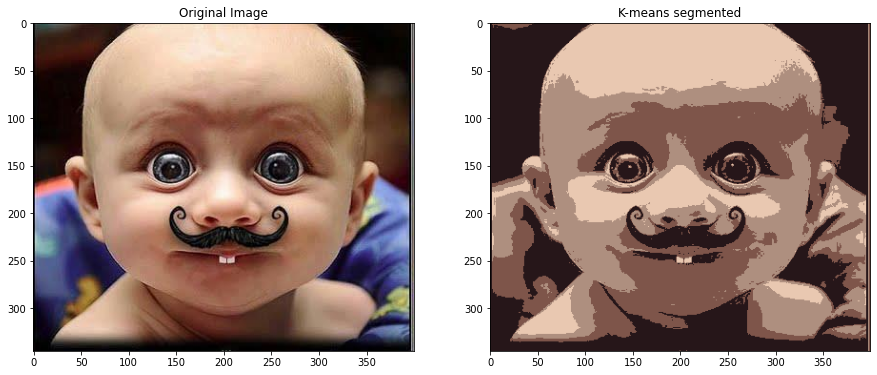

In [13]:
img = cv2.imread('img/kid.jpg')
                
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))


(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))

ax1.title.set_text('Original Image')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(img)

ax2.title.set_text('K-means segmented')
res2 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
ax2.imshow(res2)

### Transformada de Hough

In [14]:
def plot_lines(output, lines, color=(0,0,255)):
    """
    Desenhar as linhas numa imagem
    """
    if lines is not None:
        for elem in lines:
            rho, theta = elem[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))

            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))

            cv2.line(output, (x1, y1),(x2, y2), (0,0,255), 2)
    return output
    

Quantas linhas detectadas?: 67


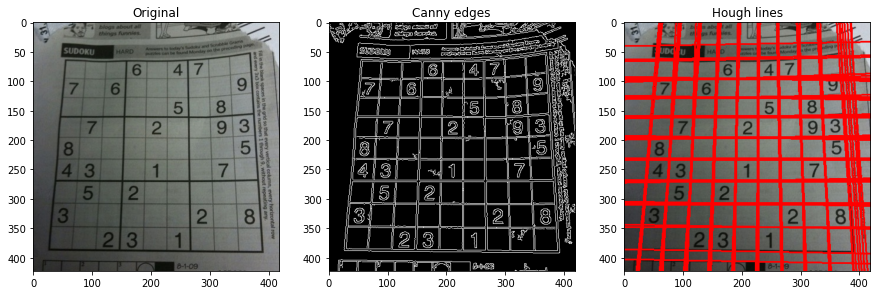

In [15]:
# detectar as linhas num jogo de sudoku

img = cv2.imread('img/sudoku-original.jpg')
# img = cv2.imread('img/sudoku.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 100, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
print("Quantas linhas detectadas?:", len(lines))

output = img.copy()
output = plot_lines(output, lines)

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 15))

ax1.title.set_text('Original')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(img)

ax2.title.set_text('Canny edges')
ax2.imshow(edges, cmap='gray')

ax3.title.set_text('Hough lines')
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
ax3.imshow(output)

Quantas linhas detectadas?: 154


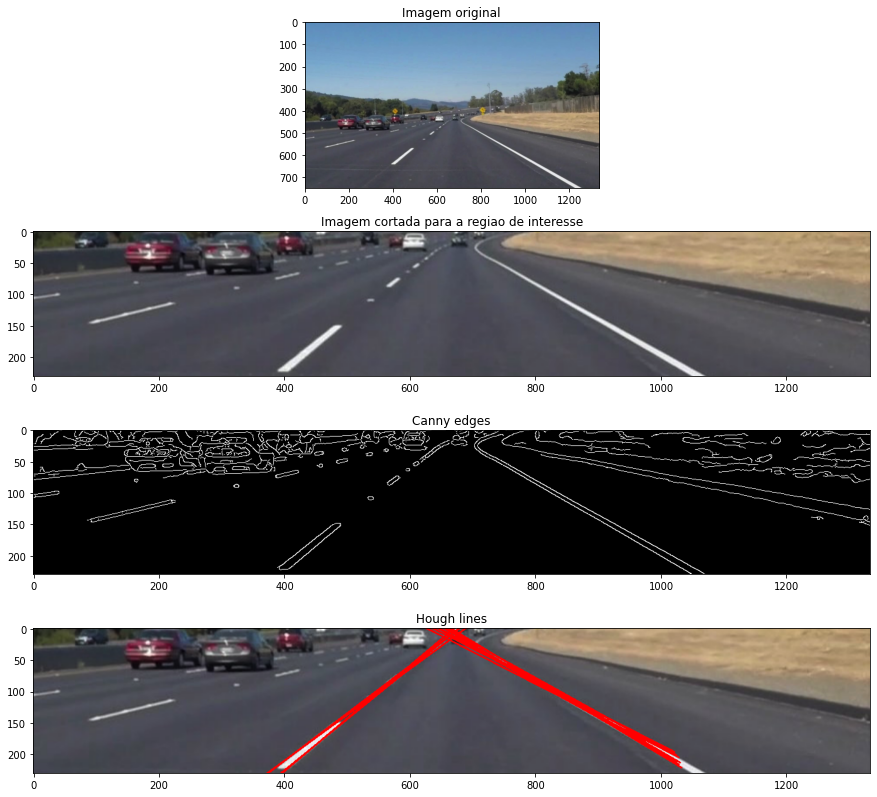

In [16]:
# Road detection

img = cv2.imread('img/road_nowhere.png')
img_crop = img[420:650,:]
gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)

# filtro da mediana
gray = cv2.medianBlur(gray, 7)

# extração de bordas com canny
edges = cv2.Canny(gray, 10, 50, apertureSize=3)

# extração de linhas com hough
lines = cv2.HoughLines(edges, 2, np.pi / 180, 150)
print("Quantas linhas detectadas?:", len(lines))

# filtrar linhas
filtered_lines = []
for elem in lines:
    rho, theta = elem[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    slope = (y2 - y1) / float(x2 - x1)
    if 0.5 < abs(slope) < 0.9:
        filtered_lines.append(elem)


output = img_crop.copy()
output = plot_lines(output, filtered_lines)

(fig, (ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, figsize=(15, 14))

ax1.title.set_text('Imagem original')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax1.imshow(img)

ax2.title.set_text('Imagem cortada para a regiao de interesse')
img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
ax2.imshow(img_crop)

ax3.title.set_text('Canny edges')
ax3.imshow(edges, cmap='gray')

ax4.title.set_text('Hough lines')
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
ax4.imshow(output)

### Harris corner detector

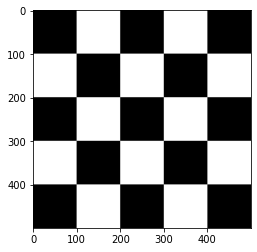

In [17]:
img = cv2.imread('img/chessboard.png')

img_copy = img.copy()
img_copy = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

#### Detetar corners

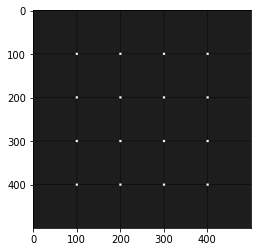

In [18]:
# Convert to grayscale
gray = cv2.cvtColor(img_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

#### Extrair e mosstar os melhores corners

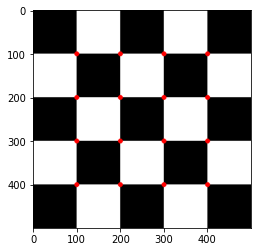

In [19]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
thresh = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(img_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (255,0,0), 3)

plt.imshow(corner_image)

### Extrair features e descritores com SIFT

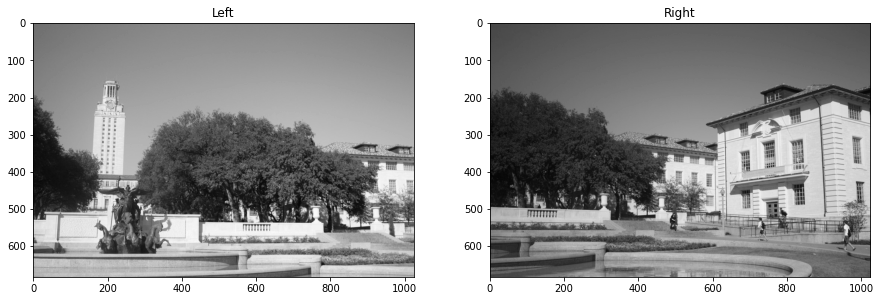

In [20]:
rgb_l = cv2.cvtColor(cv2.imread("img/keypoints_left.jpg"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
rgb_r = cv2.cvtColor(cv2.imread("img/keypoints_right.jpg"), cv2.COLOR_BGR2RGB)
gray_r = cv2.cvtColor(rgb_r, cv2.COLOR_RGB2GRAY)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))

ax1.title.set_text('Left')
ax1.imshow(gray_l, cmap='gray')

ax2.title.set_text('Right')
ax2.imshow(gray_r, cmap='gray')

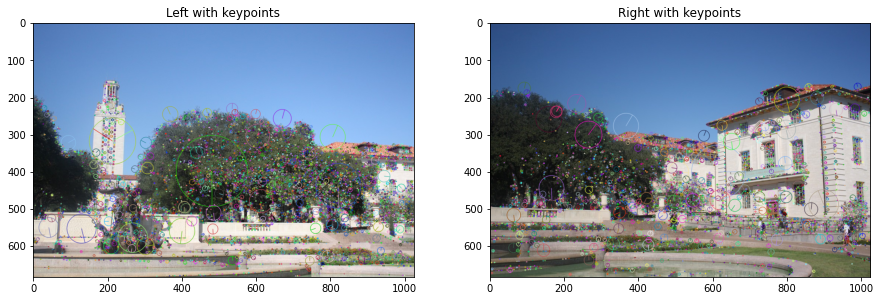

In [22]:
# use orb if sift is not installed
#feature_extractor = cv2.ORB_create()
#feature_extractor = cv2.xfeatures2d.SIFT_create()  # older opencv
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_r, desc_r = feature_extractor.detectAndCompute(gray_r, None)

rgb_l_keypoints = cv2.drawKeypoints(rgb_l, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
rgb_r_keypoints = cv2.drawKeypoints(rgb_r, kp_r, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))

ax1.title.set_text('Left with keypoints')
ax1.imshow(rgb_l_keypoints)

ax2.title.set_text('Right with keypoints')
ax2.imshow(rgb_r_keypoints)

#### Registro de imagens (panorama)

O que podemos fazer então com as duas imagens com features e descritores extraidos?
Podemos casar as duas imagens, encontrar os pontos de interesse (features) e extrair a forma de descrever esses pontos de interesse (descriptores), e verificar quais pontos de interesse são similares entre as duas imagens

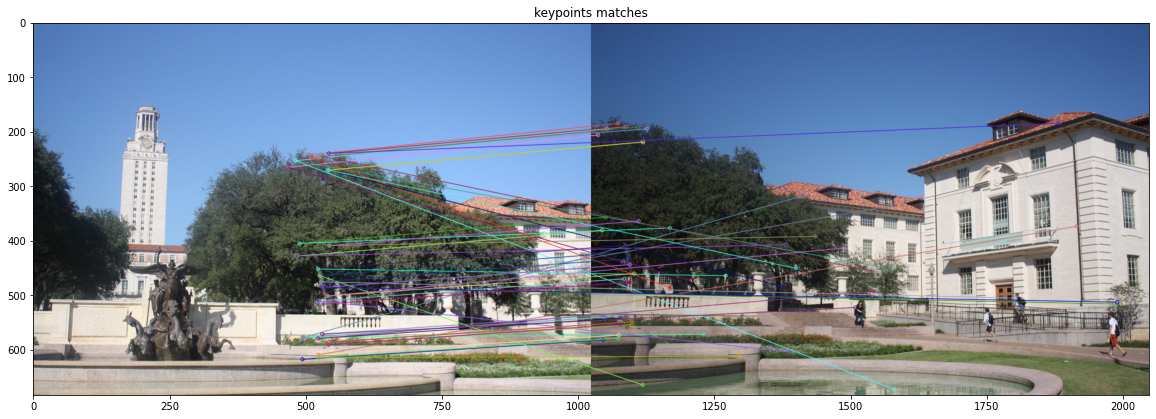

In [23]:
# opencv tem a funcao de fazer força bruta entre os descritores das duas imagens
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_r, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_r, kp_r,
                                good_match[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()

In [24]:
good_kp_l = np.array([kp_l[m.queryIdx].pt for m in good_match_arr[:, 0]]).reshape(-1, 1, 2)
good_kp_r = np.array([kp_r[m.trainIdx].pt for m in good_match_arr[:, 0]]).reshape(-1, 1, 2)
H, masked = cv2.findHomography(good_kp_r, good_kp_l, cv2.RANSAC, 5.0)

print("Homografia entre as imagens:", H)

Homografia entre as imagens: [[ 7.66113523e-01  3.52741456e-02  4.46996387e+02]
 [-1.34989563e-01  9.10628562e-01  7.62880393e+01]
 [-2.09763713e-04 -3.43883914e-05  1.00000000e+00]]


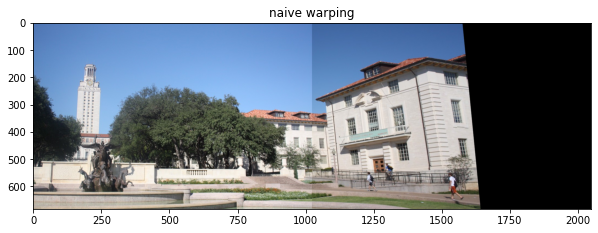

In [25]:
rgb_r_warped = cv2.warpPerspective(rgb_r, H, (rgb_l.shape[1] + rgb_r.shape[1], rgb_l.shape[0]))
rgb_r_warped[0:rgb_l.shape[0], 0:rgb_l.shape[1]] = rgb_l

plt.figure(figsize=(10, 10))
plt.imshow(rgb_r_warped)
plt.title("naive warping")
plt.show()

Uma melhor forma de fazer o registro sem cortar partes das imagens:

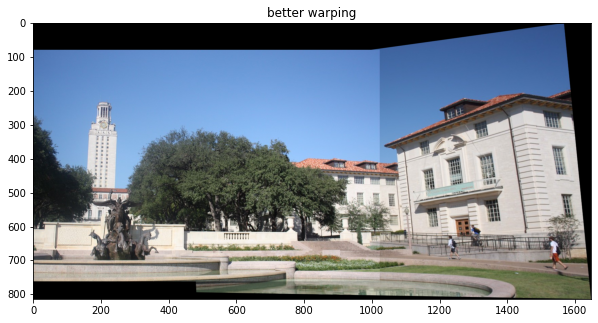

In [26]:
# função de transformação entre as duas imagens que não corta a imagem

def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H
    from: https://stackoverflow.com/questions/13063201/how-to-show-the-whole-image-when-using-opencv-warpperspective
    '''
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    pts1 = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
    pts2 = np.float32([[0, 0], [0, h2], [w2, h2], [w2, 0]]).reshape(-1, 1, 2)
    pts2_ = cv2.perspectiveTransform(pts2, H)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
    t = [-xmin, -ymin]
    Ht = np.array([[1, 0, t[0]], [0, 1, t[1]], [0, 0, 1]])  # translate

    result = cv2.warpPerspective(img2, Ht.dot(H), (xmax-xmin, ymax-ymin))
    result[t[1]:h1+t[1], t[0]:w1+t[0]] = img1
    return result


result = warpTwoImages(rgb_l, rgb_r, H)

plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.title("better warping")
plt.show()